In [48]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from data_loader import load_xenium_breast_cancer
from matplotlib.colors import TwoSlopeNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

from famo.plotting import plot_factor_correlation, plot_training_curve, plot_variance_explained
from famo.utils_io import load_model

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
data = load_xenium_breast_cancer()

/data/walter/miniconda3/envs/famo/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/data/walter/miniconda3/envs/famo/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [24]:
# prismo_model = CORE(device="cuda:0")
# prismo_model.fit(
#     data=data,
#     n_factors=10,
#     weight_prior="Horseshoe",
#     factor_prior={"group_spatial" : "GP", "group_scrna" : "Normal"},
#     likelihoods="Normal",
#     covariates_obsm_key={"group_spatial" : "spatial", "group_scrna" : None},
#     max_epochs=3000,
#     early_stopper_patience=20,
#     lr=5e-2,
#     plot_data_overview=False,
#     save=True,
#     save_path="prismo_gaussian",
#     init_scale=0.1,
#     gp_n_inducing=2000,
#     seed=5432,
#     batch_size=15000,
#     print_every=1,
# )

prismo_model = load_model("prismo_gaussian")

Model loaded from prismo_gaussian/model.pkl
Parameters loaded from prismo_gaussian/params.save


In [25]:
plot_training_curve(prismo_model)

alt.Chart(...)

In [33]:
z_spatial = prismo_model.get_factors()["group_spatial"].values
z_scrna = prismo_model.get_factors()["group_scrna"].values
w = prismo_model.get_weights()["rna"].T.values

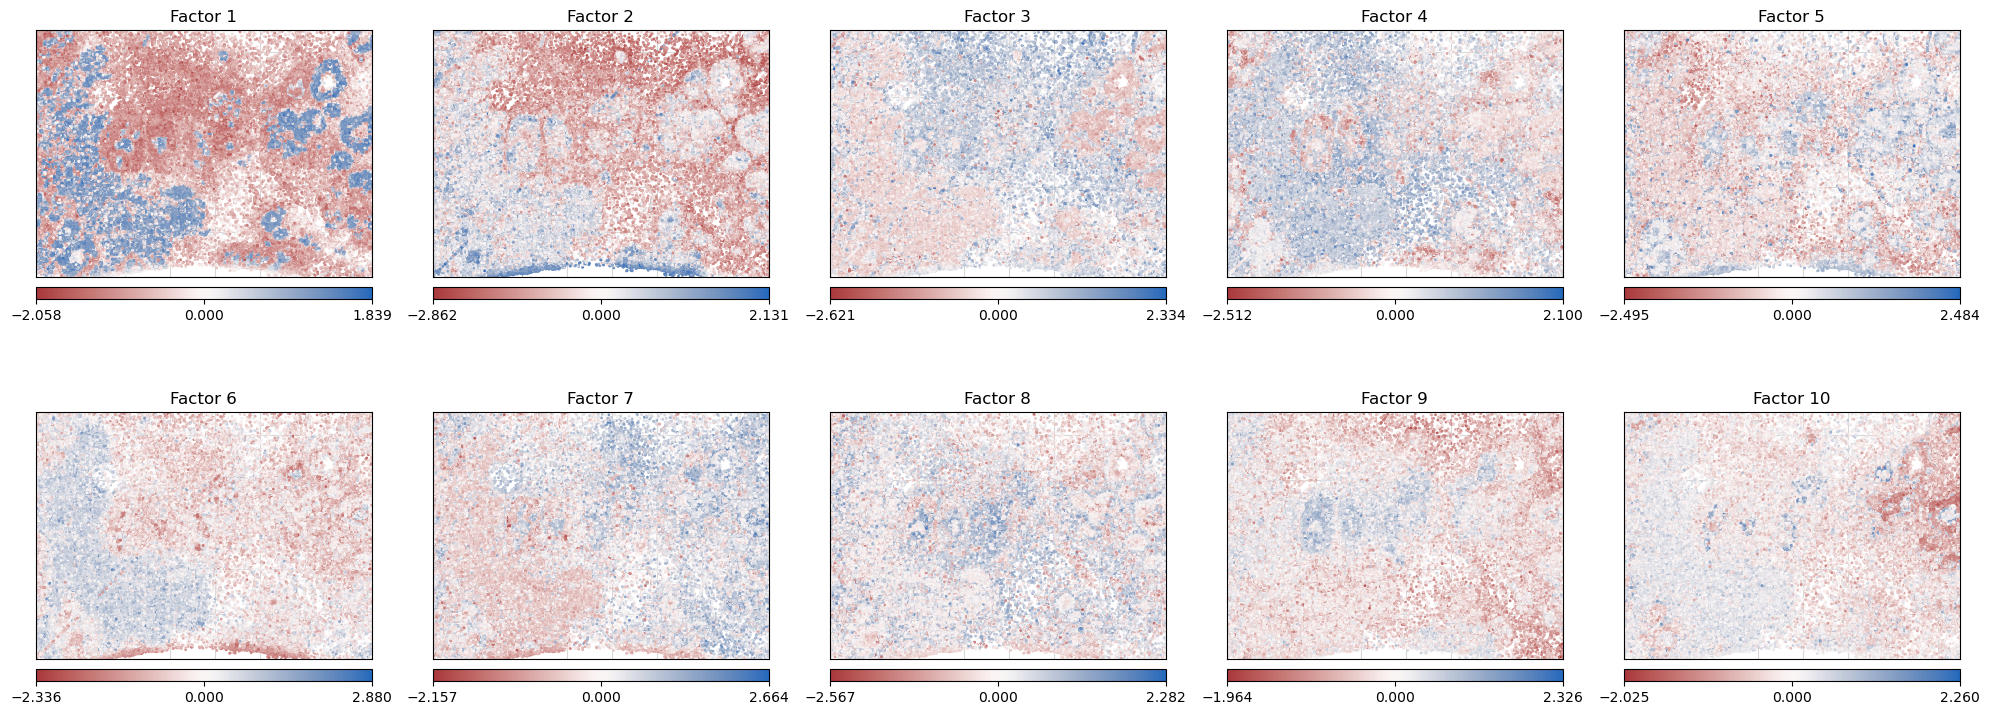

In [40]:
x = prismo_model.covariates['group_spatial']

fig, axs = plt.subplots(2, prismo_model.n_factors // 2, figsize=(20, 8))

for factor in range(prismo_model.n_factors):
    ax = axs.flatten()[factor]
    sc = ax.scatter(
        x[:, 0], x[:, 1], s=1, c=z_spatial[:, factor], cmap=plt.get_cmap('vlag_r'), zorder=2, norm=TwoSlopeNorm(vcenter=0), rasterized=True)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("bottom", size="5%", pad=0.1)
    cbar = fig.colorbar(sc, cax=cax, orientation='horizontal')
    cbar.ax.set_xticks([z_spatial[:, factor].min(), 0.0, z_spatial[:, factor].max()])
    ax.set_title(f"Factor {factor + 1}")
    ax.grid(which='both', zorder=0, alpha=0.5)
    ax.set_aspect(1.)
    ax.set_ylim(0, 5500)
    ax.set_xlim(0, 7500)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(axis='both', which='both', length=0)

plt.tight_layout()

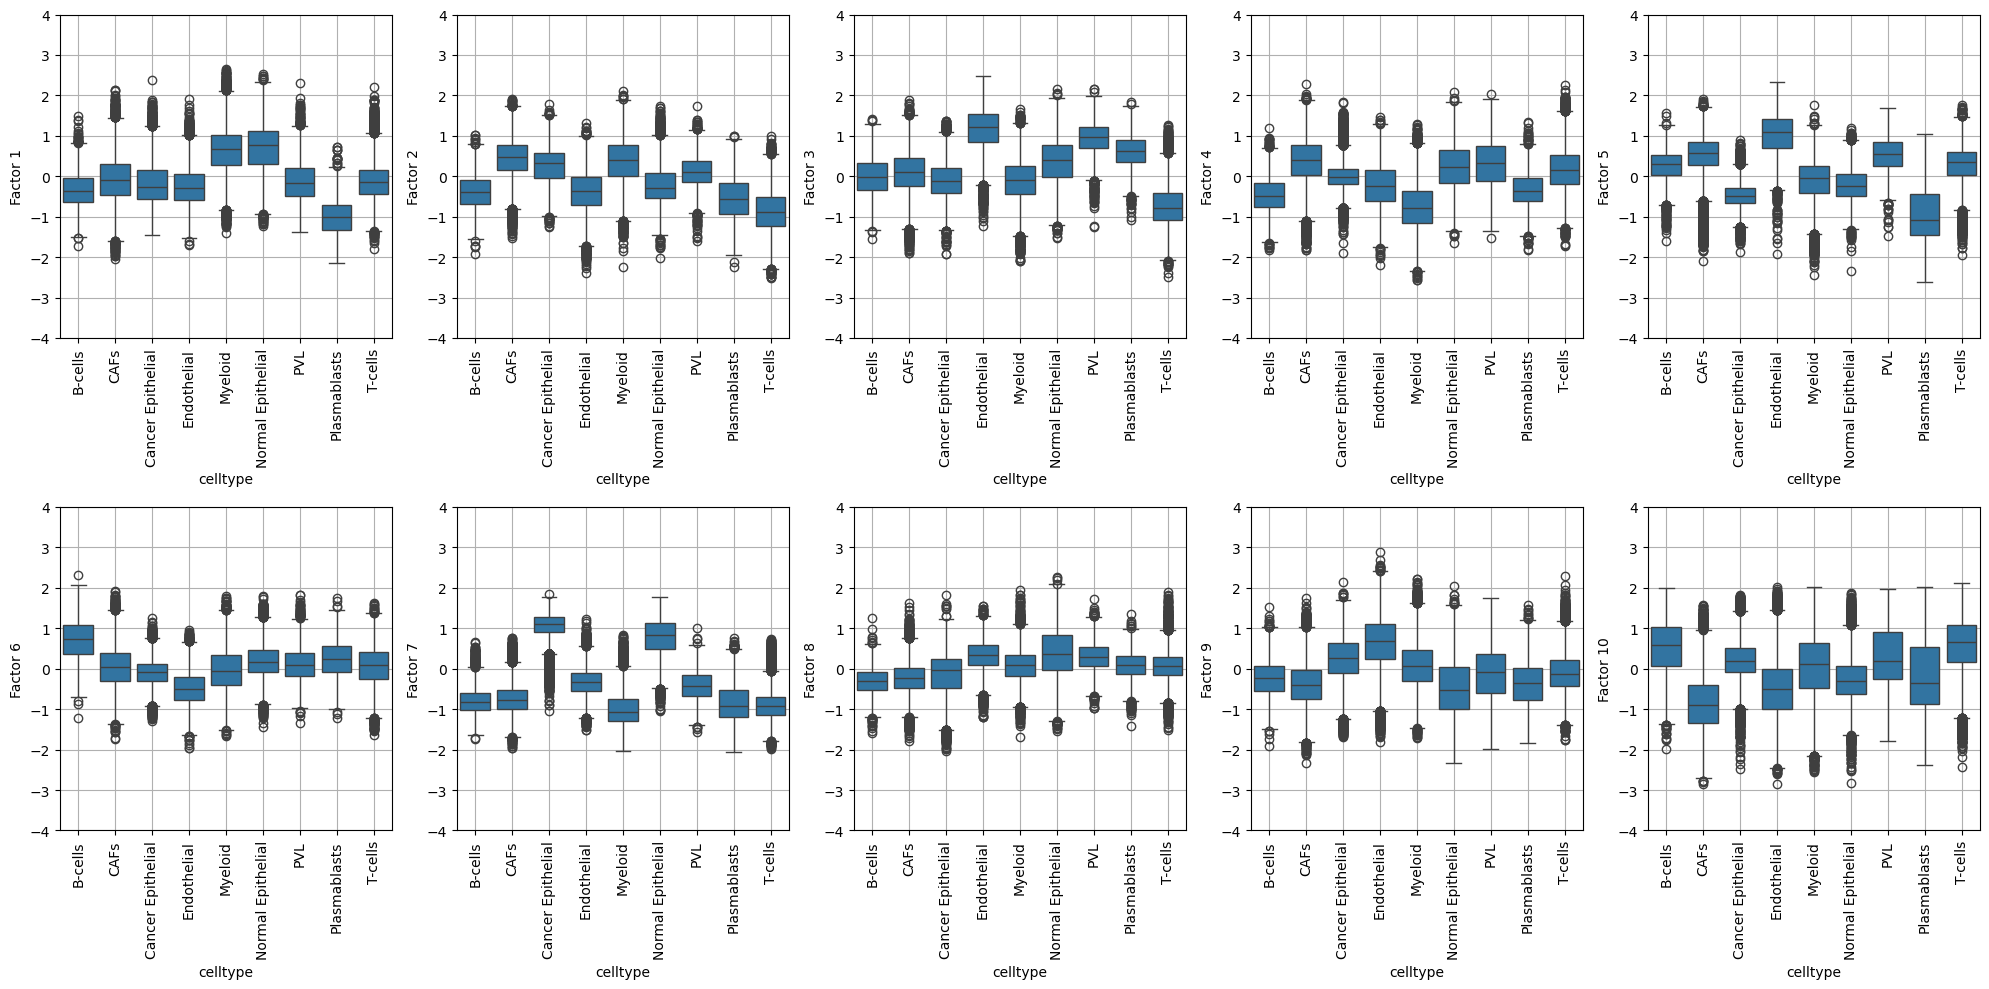

In [45]:
df = pd.concat([prismo_model.get_factors()["group_spatial"], data['group_spatial']['rna'].obs], axis=1)

fig, axs = plt.subplots(2, 5, figsize=(20, 10))

for i in range(10):
    ax = axs.flatten()[i]
    sns.boxplot(x='celltype', y=f'Factor {i+1}', data=df, ax=ax)
    ax.set_ylim(-4., 4.)
    ax.grid()
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()

In [47]:
plot_variance_explained(prismo_model)

alt.HConcatChart(...)

In [49]:
plot_factor_correlation(prismo_model)

alt.HConcatChart(...)